In [60]:
import os
import requests
from zipfile import ZipFile 
import numpy as np
import urllib

In [4]:
HOUSING_URL ='https://github.com/YamunaNarayana/Housing/blob/main/archive.zip'
HOUSING_PATH = os.path.join('dataset', "house_data")


In [5]:
def fetch_housing_data (housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True )
    filename = housing_url.split('/')[-1]
    zip_path=os.path.join(housing_path, filename)
    urllib.request.urlretrieve(housing_url, zip_path)
    
    print('download completed')
    
    with ZipFile(zip_path, 'r') as zip:
        zip.printdir()
        print('extracting all files')
        zip.extractall(housing_path)
   
    

In [ ]:
fetch_housing_data()

In [6]:
#loading data
import pandas as pd
def loading_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path, 'Housing.csv')
    return pd.read_csv(csv_path)

In [7]:
housing=loading_housing_data()

In [8]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
housing['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [11]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


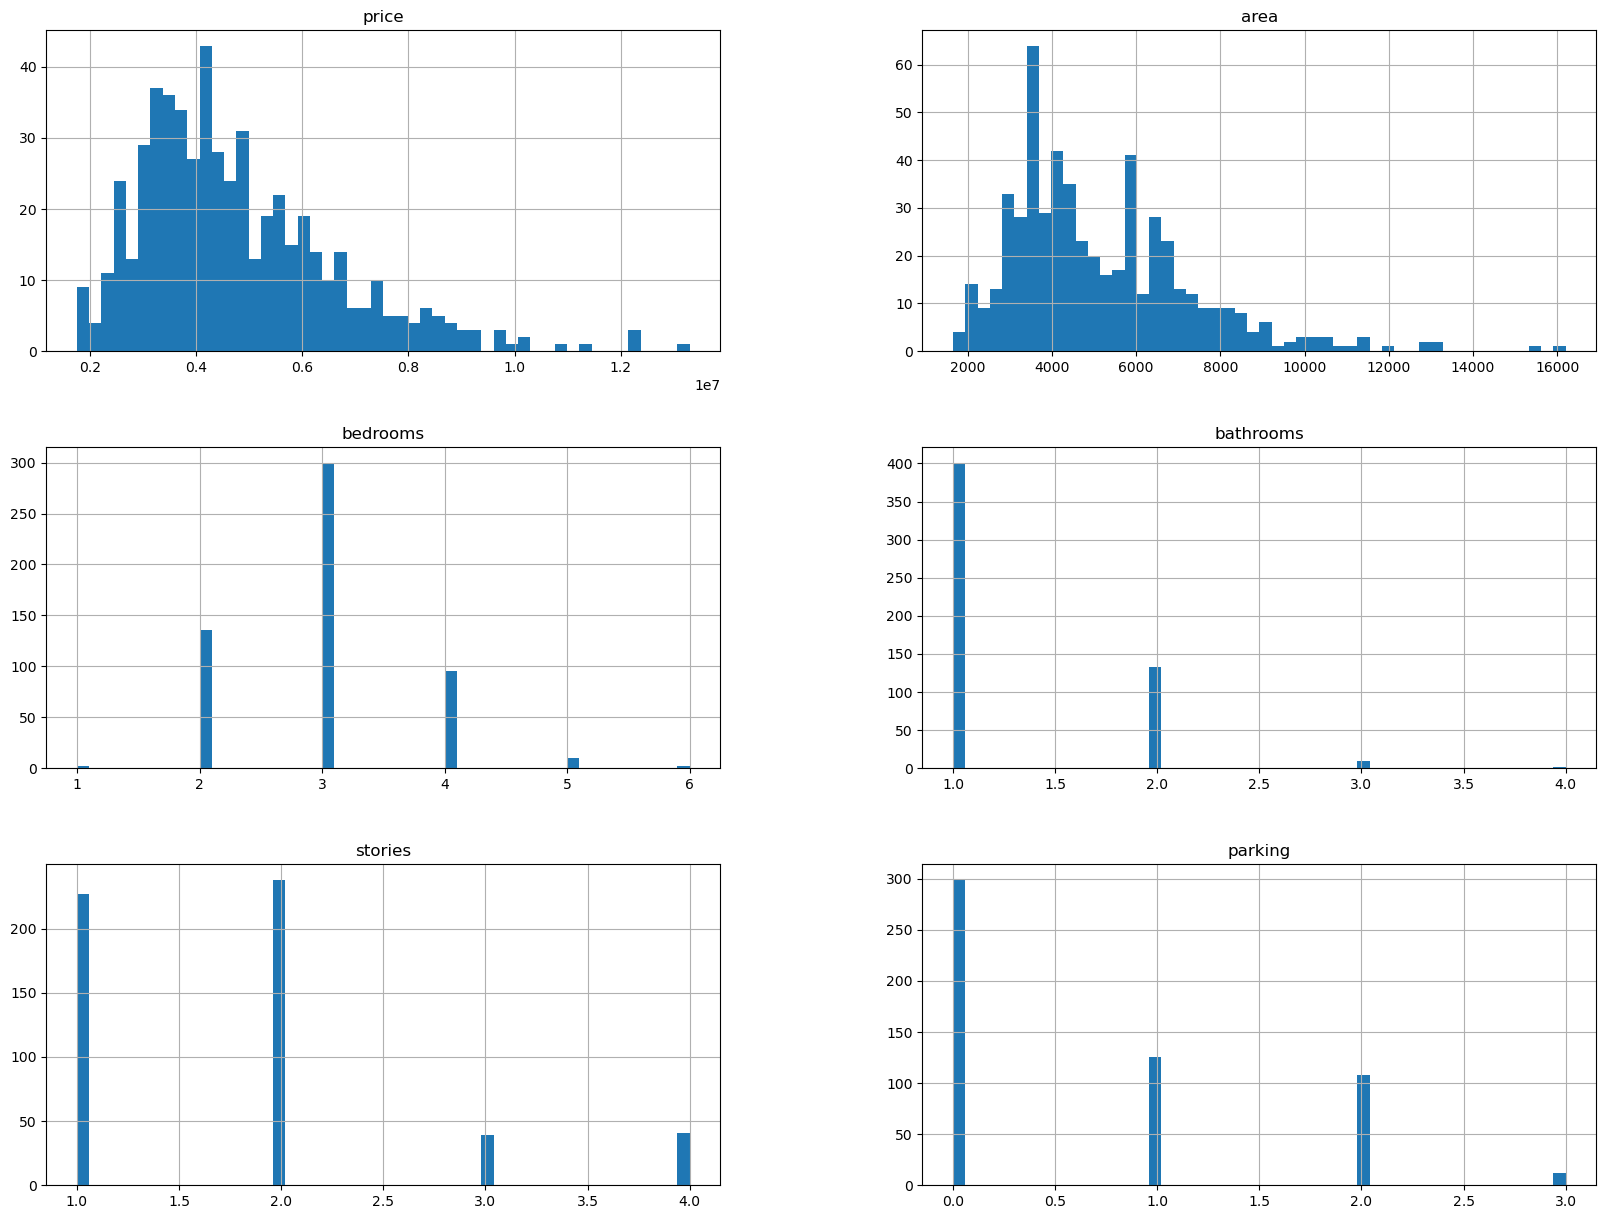

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
y=housing['price']
x=housing.drop('price', axis=1)

In [15]:
x_train, x_test, y_train, y_test =train_test_split(x,y, random_state=104, test_size=0.25)

In [16]:
train_set, test_set= train_test_split(housing, random_state=104, test_size=0.25)

In [17]:
corr_matrix=train_set.corr()

In [18]:
corr_matrix['price'].sort_values(ascending=False)

price        1.000000
area         0.526056
bathrooms    0.505282
stories      0.414363
bedrooms     0.378770
parking      0.354482
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='area', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='stories', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='area'>,
        <AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='area'>,
        <AxesSubplot:xlabel='stories', ylabel='area'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='area', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='stories', ylabel='bathrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='stories'>,
        <AxesSubplot:xlabel='area', ylabel='stories'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='stories'>,
        <AxesSubplot:xlabel='stories', ylabel='stories'>]], dtype=object)

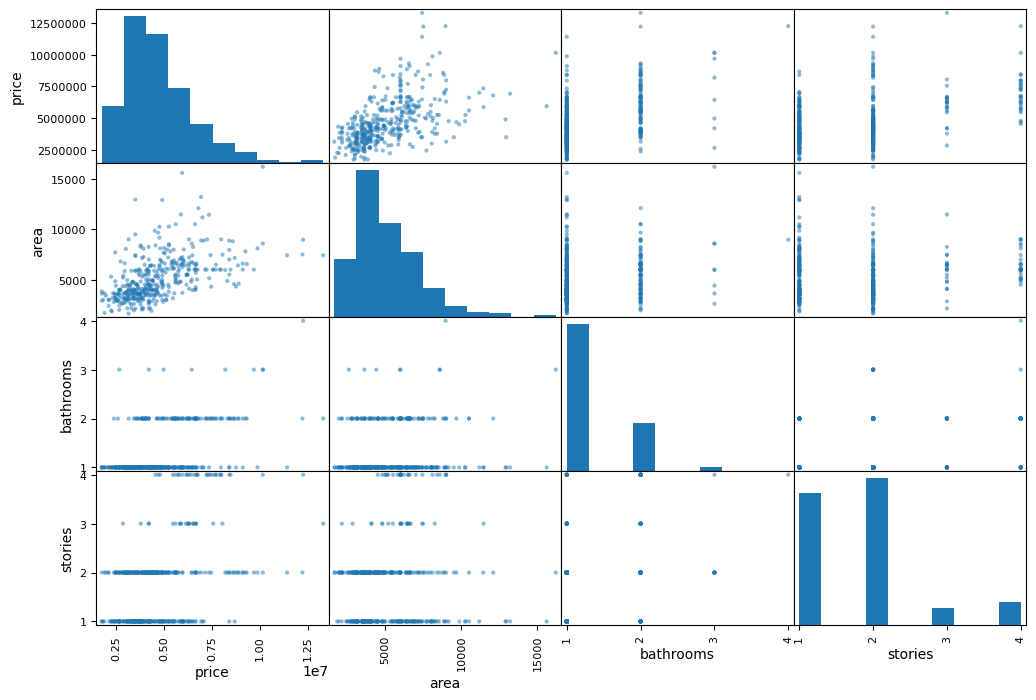

In [19]:
from pandas.plotting import scatter_matrix
attributes=['price', 'area', 'bathrooms', 'stories']
scatter_matrix(train_set[attributes], figsize=(12,8))

<AxesSubplot:xlabel='area', ylabel='price'>

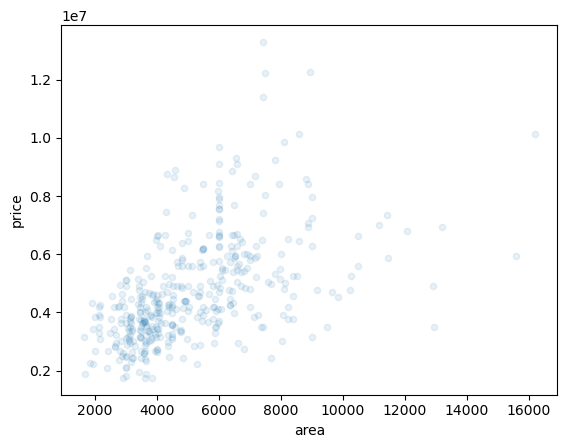

In [20]:
train_set.plot(kind='scatter', x='area', y='price', alpha=0.1)

In [21]:
housing_predictors=housing.drop('price', axis=1)

In [22]:
housing_label=housing['price']

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer=SimpleImputer(strategy='median')

In [25]:
housing_num=housing[['area','bedrooms','bathrooms','stories', 'parking']]

In [26]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([4.6e+03, 3.0e+00, 1.0e+00, 2.0e+00, 0.0e+00])

In [28]:
X=imputer.transform(housing_num)

In [29]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [30]:
housing_tr

,area,bedrooms,bathrooms,stories,parking
0,7420.0,4.0,2.0,3.0,2.0
1,8960.0,4.0,4.0,4.0,3.0
2,9960.0,3.0,2.0,2.0,2.0
3,7500.0,4.0,2.0,2.0,3.0
4,7420.0,4.0,1.0,2.0,2.0
...,...,...,...,...,...
540,3000.0,2.0,1.0,1.0,2.0
541,2400.0,3.0,1.0,1.0,0.0
542,3620.0,2.0,1.0,1.0,0.0
543,2910.0,3.0,1.0,1.0,0.0


In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
ordinal_encoder=OrdinalEncoder()

In [33]:
housing_cat=housing[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [34]:
ab=pd.DataFrame(housing_cat_encoded, columns=housing_cat.columns, index=housing_cat.index)

In [35]:
ab

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
ordinal_encoder.categories_

[array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)]

In [37]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()

In [38]:
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [39]:
cat_encoder.categories_

[array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)]

In [40]:
from sklearn.linear_model import LinearRegression

In [43]:
Housing_feature=pd.DataFrame.join(housing_tr, ab)

In [44]:
Housing_feature

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,7420.0,4.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,8960.0,4.0,4.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,9960.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,7500.0,4.0,2.0,2.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,7420.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,3620.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
lin_reg= LinearRegression()

In [47]:
lin_reg.fit(Housing_feature, housing_label)

LinearRegression()

In [63]:
x1=Housing_feature.iloc[0]
x_array=np.array([x1])

In [55]:
y1=housing_label.iloc[0]
y1

13300000

In [64]:
lin_reg.predict(x_array)

C:\Users\Yamuna\anaconda31\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8201865.49940512])

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
Housing_prediction =lin_reg.predict(Housing_feature)

In [67]:
lin_mse=mean_squared_error(housing_label, Housing_prediction)

In [68]:
lin_rmse=np.sqrt(lin_mse)

In [69]:
lin_rmse

1056995.064075431